In [2]:
pip install fastbook fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 16.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [3]:
from fastbook import *
from fastai.vision.all import *

In [4]:
bear_types = 'Sumatran Orangutan', 'African Lion', 'Hamadryas Baboon', 'Western Lowland Gorilla', 'Reticulated Giraffe', 'Eastern White-bearded Wildebeest', 'Syrian Brown Bear', 'Giant Anteater', 'Indian Crested Porcupine', 'Hippopotamus', "Grant's Zebra", 'Brown-nosed Coati', 'Sand Cat', 'Sumatran Tiger', 'Crowned Lemur', 'Ring-tailed Lemur', "Reeves's Muntjac", 'Mandrill', 'Sulawesi Crested Macaque', 'Persian Leopard', 'Meerkat', "Linne's two-toed sloth", 'African Wild-ass', 'Asian Elephant', 'African Elephant', 'Fat Sand Rat', 'Thomson Gazelle', 'Defassa waterbuck', 'Guereza', 'Southern White-breasted Hedgehog', 'Red Kangaroo', 'Common Eland', 'Southern White Rhinoceros', "Lyle's flying fox", 'Fennec Fox', 'Central African Chimpanzee'
key = os.environ.get('AZURE_SEARCH_KEY')
path = Path('animals')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [5]:
fns = get_image_files(path)
fns

(#5104) [Path('animals/Central African Chimpanzee/97b09689-5f2b-49fc-a989-297c909c4769.jpg'),Path('animals/Central African Chimpanzee/33ba8278-3ae9-453c-9898-503ba2f852e3.jpg'),Path('animals/Central African Chimpanzee/fe747f11-8aae-4a8d-8ccb-affef0831265.jpg'),Path('animals/Central African Chimpanzee/338bb1a0-9dca-4ba7-bdb6-ffea886cf0df.jpg'),Path('animals/Central African Chimpanzee/6205fd5b-87dc-4fc9-a9c8-25fb97da4b4b.jpg'),Path('animals/Central African Chimpanzee/a80e12c3-507c-4873-a5a9-37355b9592c7.jpg'),Path('animals/Central African Chimpanzee/ab5d4de9-7068-463c-bd75-02b5685b0ecd.jpg'),Path('animals/Central African Chimpanzee/f8a660fe-4f66-4b80-96cf-60c3c4ac996b.jpg'),Path('animals/Central African Chimpanzee/1b67abab-971a-4561-ab84-62ee79ec187b.jpg'),Path('animals/Central African Chimpanzee/8b986b2d-ebd6-4061-9c13-cf6af3684a42.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#80) [Path('animals/Central African Chimpanzee/338bb1a0-9dca-4ba7-bdb6-ffea886cf0df.jpg'),Path('animals/Central African Chimpanzee/ef5d28b9-74d4-464e-82df-b7b45b0d12f2.jpg'),Path('animals/Sand Cat/8c1e2dc2-0065-4565-887a-1dbb65fd4176.jpg'),Path('animals/Sand Cat/355b06e9-bd20-4600-90d0-7e3feb3cb4ee.jpg'),Path('animals/Sand Cat/4897a7c6-0498-4924-bd83-53229392d757.jpg'),Path('animals/Sand Cat/f6a0ac66-a67d-4654-b9f4-efe956c728f8.jpg'),Path('animals/African Lion/0966c7a5-7611-42b7-8b7a-01ee0012bec5.jpg'),Path('animals/African Lion/3e71a458-d83c-48fb-915b-8031bfb961fc.jpg'),Path('animals/African Lion/f865fd3c-daae-4073-8b1c-606e3534a324.jpg'),Path('animals/African Lion/e7948f0a-b822-45ff-82e4-c64365311cf6.jpg')...]

In [7]:
failed.map(Path.unlink);

In [8]:

animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(),
    )
dls = animals.dataloaders(path)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.778082,0.219943,0.064741,02:25


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.380646,0.151674,0.034861,02:25
1,0.272515,0.138882,0.032869,02:24
2,0.195622,0.146684,0.033865,02:24
3,0.143267,0.136271,0.026892,02:26
4,0.098113,0.126999,0.028884,02:24
5,0.077305,0.125691,0.023904,02:25
6,0.063532,0.117909,0.020916,02:26
7,0.047957,0.116783,0.021912,02:25


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [10]:
interp = ClassificationInterpretation.from_learner(learn)


In [11]:
interp.plot_top_losses(20, nrows=20)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
uploader = SimpleNamespace(data = ['images/tiger.jpg'])

In [24]:

pred,pred_idx,probs = learn.predict(img)
prediction = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

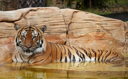

In [18]:
uploader = SimpleNamespace(data = ['images/tiger.jpg'])
img = PILImage.create(uploader.data[0])
img.to_thumb(128,128)

In [17]:
prediction


'Prediction: Sumatran Tiger; Probability: 0.9998'

In [19]:
learn.export()

In [20]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [21]:
learn_inf = load_learner(path/'export.pkl')

In [23]:
pred,pred_idx,probs = learn_inf.predict(img)
prediction = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
prediction

'Prediction: Sumatran Tiger; Probability: 0.9998'